# **Task A**
Artificial intelligence has emerged as a promising solution for numerous challenges, often leading to expectations of easy and effortless problem-solving. However, it's essential to critically evaluate the performance of AI models, especially in **supervised learning** scenarios. This work explores key performance metrics derived from the **confusion matrix**: **Precision**, **Recall**, **Specificity**, **False Positive Rate**, **False Negative Rate**, **Accuracy**, **Spatial Accuracy**, **Jaccard Index**, and **F-measure**. By understanding and comparing these metrics, we can gain insights into a model's strengths and weaknesses. We will analyze these metrics in detail and compare their performance across six example methods, demonstrating the complexities involved in assessing supervised learning models.

## **About the dataset**
The idea of ​​this work is to highlight the validation methods and explore from very real to exaggerated examples that in certain scenarios could be considered good results by ignoring certain metrics. Even though they are really nonsense, for this we will base ourselves on the following table:
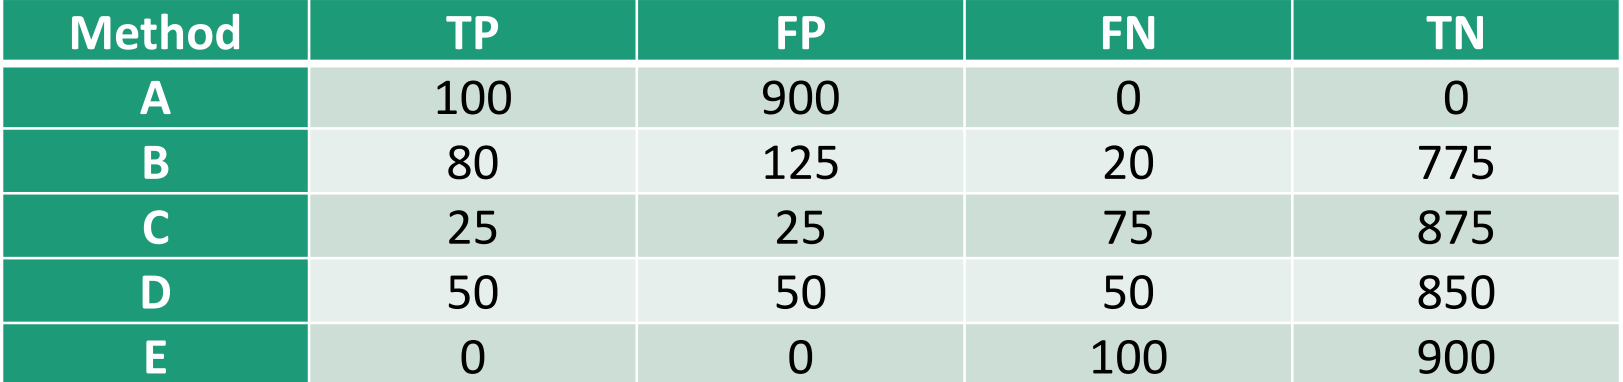



The six hypothetical methods in this study are applied to a common dataset comprising **1000 samples** categorized into **two classes** that we could simplify as positive or negative (it could be 0 or 1, True or False, etc.). Importantly, this dataset is **unbalance**, with a significant disparity between the class distributions (100 positive samples and 900 negative samples). Imbalanced datasets can *lead to biased models, misleading evaluation metrics and overfitting*, as observed in methods A and E. To mitigate these issues, various techniques can be employed, such as oversampling (Oversampling of the minority class: artificially increase the number of examples in the minority class, adding invented data), in case of not wanting to affect honesty, one should opt for undersampling (Reduce the number of examples in the majority class. Eliminating data until the classes are equal) or weight adjustment and the use of appropriate metrics.


In [9]:
try:
    import pandas as pd
except ModuleNotFoundError:
    # If not installed, it is installed automatically
    !pip install pandas
    import pandas as pd

# DataFrame original
table = {
    'Method': ['A', 'B', 'C', 'D', 'E'],
    'TP': [100, 80, 25, 50, 0],
    'FP': [900, 125, 25, 50, 0],
    'FN': [0, 20, 75, 50, 100],
    'TN': [0, 775, 875, 850, 900]
}

df_original = pd.DataFrame(table)

print(df_original)
# Crear una copia del original y añadir el caso perfecto
df_with_perfect = df_original.copy()

# Añadir la fila "perfect"
df_with_perfect.loc[len(df_with_perfect)] = ['perfect', 100, 0, 0, 900]

  Method   TP   FP   FN   TN
0      A  100  900    0    0
1      B   80  125   20  775
2      C   25   25   75  875
3      D   50   50   50  850
4      E    0    0  100  900


For this work, it occurred to me to **add a method which represents a perfect model to facilitate the understanding** of how it should look in the idealized case where the model correctly defines all the classes of the samples.

### **Confusion matrix**

is a table used in classification problems to evaluate the performance of a method. It compares the predicted outcomes with the actual outcomes by organizing the results into four categories:

*  **True Positive (TP):** These are instances where the model correctly predicted the positive class (the model predicted "positive," and the actual value was "positive").

*   **False Positive (FP):** These are instances where the model incorrectly predicted the positive class (the model predicted "positive," but the actual value was "negative").

*   **True Negative (TN):** These are instances where the model correctly predicted the negative class (the model predicted "negative," and the actual value was "negative").


*   **False Negative (FN):** These are instances where the model incorrectly predicted the negative class (the model predicted "negative," but the actual value was "positive").



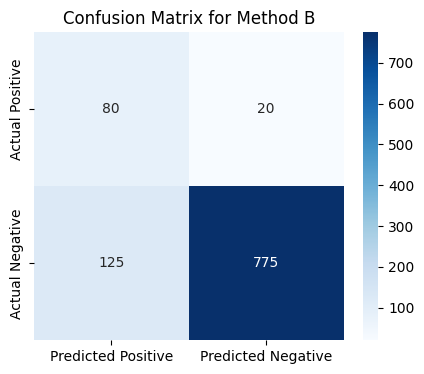

In [10]:
try:
    import seaborn as sns
except ModuleNotFoundError:
    # If not installed, it is installed automatically
    !pip install seaborn
    import seaborn as sns

try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    # If not installed, it is installed automatically
    !pip install matplotlib
    import matplotlib.pyplot as plt

# Select data for Method B
TP = df_with_perfect.iloc[1]['TP']
FP = df_with_perfect.iloc[1]['FP']
FN = df_with_perfect.iloc[1]['FN']
TN = df_with_perfect.iloc[1]['TN']

# Create the confusion matrix
confusion_matrix = [[TP, FN], [FP, TN]]

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix for Method B')
plt.show()


It was shown how the confusion matrix is ​​for the case of method B, as can be seen the diagonal whose spaces correspond to (1,1) and (2,2) correspond to the correct values ​​in the case of method B of the 100 true samples, it correctly catalogued 80 of them, and in the case of the 900 false it catalogued 775 correctly.

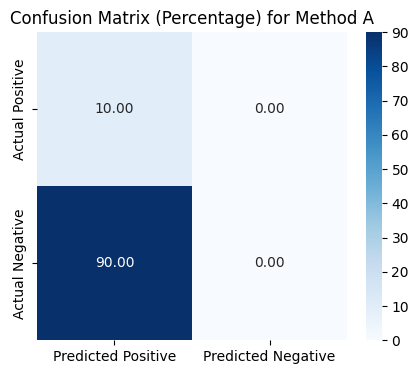

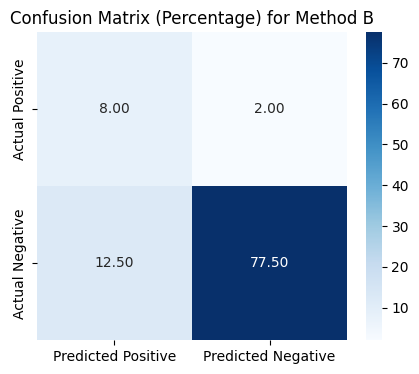

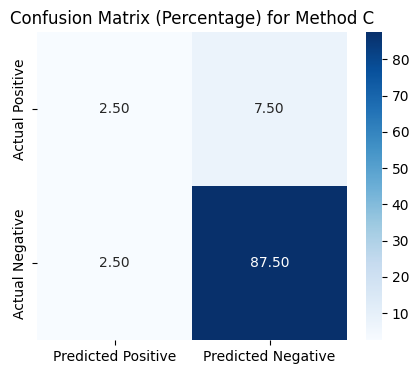

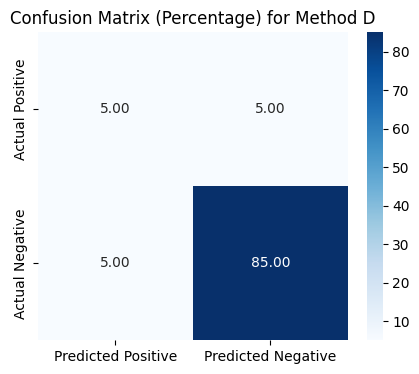

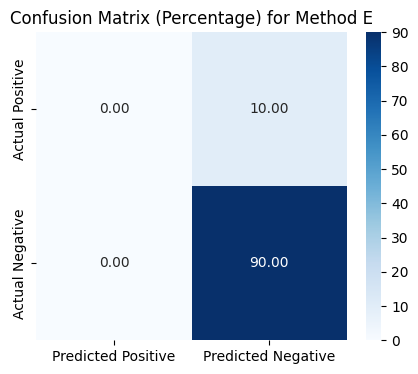

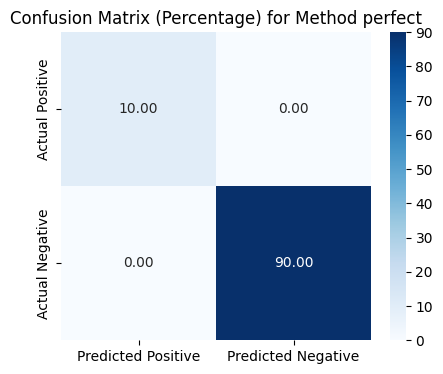

In [3]:
# Function to plot confusion matrices as percentages
def plot_confusion_matrices(df, total_samples):
    for index, row in df.iterrows():
        method = row['Method']
        TP = row['TP']
        FP = row['FP']
        FN = row['FN']
        TN = row['TN']

        # Calculate percentages
        TP_pct = TP / total_samples * 100
        FP_pct = FP / total_samples * 100
        FN_pct = FN / total_samples * 100
        TN_pct = TN / total_samples * 100

        # Create the confusion matrix as percentages
        confusion_matrix = [[TP_pct, FN_pct], [FP_pct, TN_pct]]

        # Plotting the confusion matrix using seaborn
        plt.figure(figsize=(5,4))
        sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=['Predicted Positive', 'Predicted Negative'],
                    yticklabels=['Actual Positive', 'Actual Negative'])

        plt.title(f'Confusion Matrix (Percentage) for Method {method}')
        plt.show()

# Total samples (1000 in your case)
total_samples = 1000

# Call the function to plot confusion matrices for all methods
plot_confusion_matrices(df_with_perfect, total_samples)

## **Evaluation Metrics**
In machine learning, evaluation metrics are crucial for assessing the performance of a model, particularly in classification tasks. Each metric offers unique insights into different aspects of the model's predictions. Here's a breakdown of the metrics:
#### **Precision (PR):** *TP / (TP + FP)*
-  Also known as the positive predictive value, tells us **how many of the predicted positives ("positive") were actually correct**. In other words, it answers: "Of all the positive predictions made by the model, how many were truly positive?"
-  Is **useful in situations where false positives (FP) are costly or highly undesirable**. For example, in spam detection, high precision ensures that legitimate emails aren't incorrectly marked as spam.

#### **Recall (RC):** *TP / (TP + FN)*
-  Also known as sensitivity or true positive rate (TPR), tells us **how many of the actual positives were correctly identified by the model**. It answers: "Out of all the real positive cases, how many were captured by the model?"
-  Is **crucial in cases where missing a positive case is costly** (false negatives are highly undesirable). In medical diagnoses, high recall means fewer missed cases of a disease.

#### **Specificity (SP):** *TN / (TN + FP)*
-  Specificity, or true negative rate (TNR), **measures the proportion of actual negatives that were correctly identified**. It answers: "Of all the real negative cases, how many did the model correctly classify as negative?"
-  Is **valuable when it’s important to correctly identify negatives**, such as in fraud detection, where you want to minimize false positives.

#### **Accuracy (ACC):** *(TN + TP) / (TP + FN + FP + TN)*
-  Measures **the overall proportion of correct predictions, including both positives and negatives**. It answers: "Out of all the samples, how many did the model classify correctly?"
-  **Is often used as a basic measure of model performance**, but it can be misleading on imbalanced datasets. For example, with a highly imbalanced dataset, a model can achieve high accuracy by simply predicting the majority class most of the time.


#### **Spatial accuracy (S) or Jaccard index (J):** *TP / (TP + FN + FP)*
-  Also known as Intersection over Union (IoU), measures **the overlap between predicted positives and actual positives.** It considers both false positives and false negatives.
-  Is often used in image segmentation tasks and other fields where **the degree of overlap between sets is important.**

#### **F-measure (Fm):** *(2 * PR * RC) / (PR + RC)*
-  **Is the harmonic mean of precision and recall**. It balances the trade-off between precision and recall by giving more weight to lower values, which makes it especially useful when you need a balance between precision and recall.
-  F1 is particularly useful when you **need to balance false positives and false negatives**, such as in binary classification problems with imbalanced datasets.

#### **False negative rate (FNR):** *FN / (TP + FN)*
-  Represents **the proportion of actual positives that the model incorrectly predicted as negatives**. It answers: "Of all the actual positives, how many did the model miss?"
-  Is **particularly useful when false negatives are costly**, such as when detecting malignant tumors, where missing a positive case could lead to harmful consequences.

#### **False Positive Rate (FPR):** *FP / (FP + TN)*
-  **Is the proportion of actual negatives that were incorrectly classified as positives.** It answers: "Of all the real negative cases, how many did the model falsely classify as positive?"
-  Is **usufel in binary classification tasks** like fraud detection, keeping FPR low is important to avoid labeling legitimate actions as fraudulent.

### **Summary of Expected Ranges:**
*  Precision, Recall, Specificity, Accuracy, Jaccard, F1: Values range from 0 to 1, with **higher values being better.**

*  False Negative Rate (FNR), False Positive Rate (FPR): Values range from 0 to 1, with **lower values being better.**



In [14]:
# Define function to calculate the metrics
def calculate_metrics(row):
    # Extract values from the row
    TP = row['TP']
    FP = row['FP']
    FN = row['FN']
    TN = row['TN']

    # Precision (PR)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall (RC)
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Specificity (SP)
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    # False Negative Rate (FNR)
    fnr = FN / (TP + FN) if (TP + FN) != 0 else 0

    # False Positive Rate (FPR)
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    # Accuracy (ACC)
    accuracy = (TP + TN) / (TP + FN + FP + TN) if (TP + FN + FP + TN) != 0 else 0

    # Jaccard Index (J)
    jaccard = TP / (TP + FN + FP) if (TP + FN + FP) != 0 else 0

    # F1 Score (Fm)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return pd.Series([precision, recall, specificity, accuracy, jaccard, f1, fnr, fpr])

# Define a function for coloring the metrics
def highlight_best_worst(s):
    is_best = s == s.max()
    is_worst = s == s.min()
    return ['background-color: lightgreen' if v else 'background-color: lightcoral' if is_worst[i] else ''
            for i, v in enumerate(is_best)]

# Highlight FNR and FPR separately based on closest to 1 and 0
def highlight_fnr_fpr(s):
    # Highlight the value closest to 1 for FNR (the worst case)
    fnr_worst_idx = (s - 1).abs().idxmin()  # Index of the value closest to 1
    # Highlight the value closest to 0 for FPR (the worst case)
    fpr_worst_idx = s.idxmin()  # Index of the minimum value (closest to 0)

    return ['background-color: lightcoral' if i == fnr_worst_idx else
            'background-color: lightgreen' if i == fpr_worst_idx else
            '' for i in range(len(s))]

# Aplicar la función al DataFrame y calcular las métricas
df_original[['Precision', 'Recall', 'Specificity', 'Accuracy', 'Jaccard', 'F1', 'FNR', 'FPR']] = df_original.apply(calculate_metrics, axis=1)

# Reordenar las columnas en el orden deseado
df_original = df_original.reindex(columns=['Method', 'TP', 'FP', 'FN', 'TN', 'Precision', 'Recall', 'Specificity', 'Accuracy', 'Jaccard', 'F1', 'FNR', 'FPR'])

# Aplicar el resaltado para los mejores valores en cada métrica
highlighted_df = df_original.style.apply(highlight_best_worst, subset=['Precision', 'Recall', 'Specificity', 'Accuracy', 'Jaccard', 'F1'])

# Resaltar FNR y FPR de manera separada
highlighted_df = highlighted_df.apply(highlight_fnr_fpr, subset=['FNR', 'FPR'])

# Salida de la tabla estilizada
highlighted_df


,Method,TP,FP,FN,TN,Precision,Recall,Specificity,Accuracy,Jaccard,F1,FNR,FPR
0,A,100,900,0,0,0.100000,1.000000,0.000000,0.100000,0.100000,0.181818,0.000000,1.000000
1,B,80,125,20,775,0.390244,0.800000,0.861111,0.855000,0.355556,0.524590,0.200000,0.138889
2,C,25,25,75,875,0.500000,0.250000,0.972222,0.900000,0.200000,0.333333,0.750000,0.027778
3,D,50,50,50,850,0.500000,0.500000,0.944444,0.900000,0.333333,0.500000,0.500000,0.055556
4,E,0,0,100,900,0.000000,0.000000,1.000000,0.900000,0.000000,0.000000,1.000000,0.000000


This code calculates performance metrics for different binary classification methods using the values ​​of the confusion matrix. The **calculate_metrics** function calculates the metrics explained above. And for ease of understanding, a highlighting style is applied to identify the best and worst values ​​of each metric. (using green for the best values ​​of each metric and red for the worst)

## **Deeper analysis of the metrics**
As mentioned above, it is important to see the overall performance of each method, since although method E is the one with the best values ​​for 3 metrics (Specificity, Accuracy and FPR) it has the worst performance in the other 5 metrics, and this is because the model suffered from the imbalance of the classes and since 9 out of 10 samples are negative, it learned that if it classifies all the samples as negative it will have a 90% success rate, and in other metrics that give greater importance to not giving false positives or obtaining all true negatives it will benefit.

Therefore, it is proposed to make a **heat map** to see each method in more detail and how it interacts with each metric, remembering that for FNR and FPR the best possible value is 0.

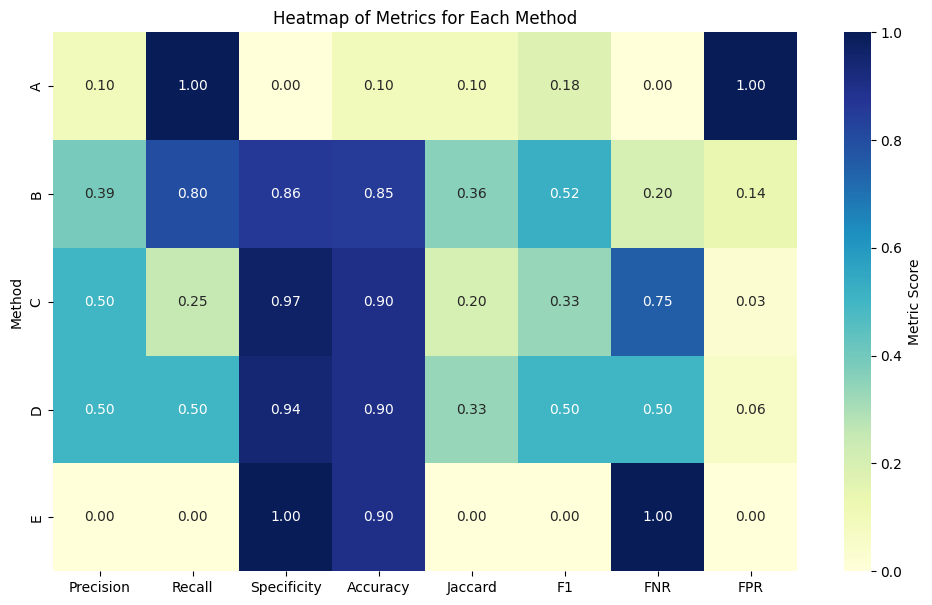

In [20]:
try:
    import numpy as np
except ModuleNotFoundError:
    # If not installed, it is installed automatically
    !pip install numpy
    import numpy as np


metrics = ['Precision', 'Recall', 'Specificity', 'Accuracy', 'Jaccard', 'F1', 'FNR', 'FPR']

# --- Heatmap ---
plt.figure(figsize=(12, 7))
heatmap_data = df_original.set_index('Method')[metrics]  # Usar solo las columnas de métricas
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Metric Score'})
plt.title('Heatmap of Metrics for Each Method')
plt.show()




Method B and Method D appear to be the most balanced, with relatively high values ​​in most positive metrics.

For the case of the **radar plot**. It will not be taken into account the FNR and FPR

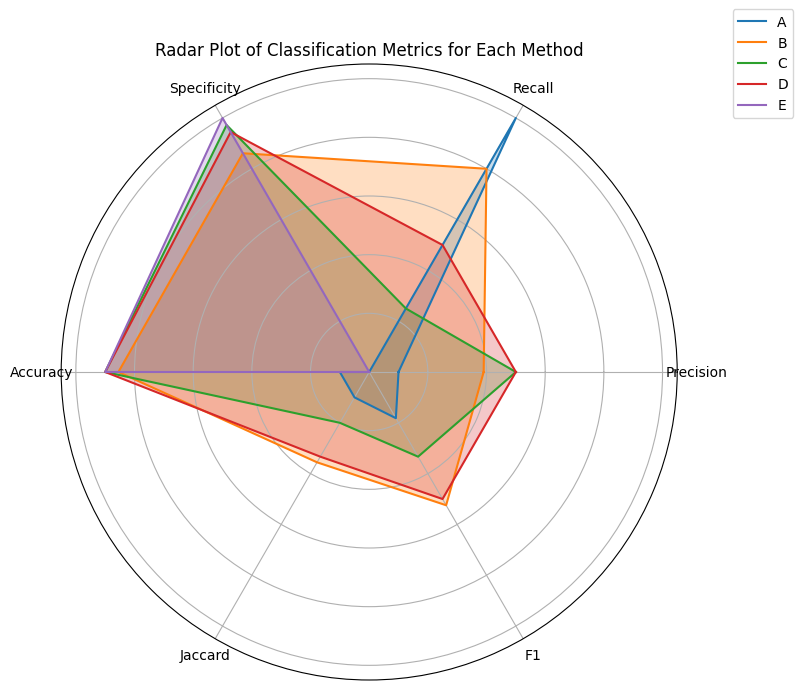

In [22]:
# --- Radar Plot ---
# Configurar los datos para el radar plot
labels = ['Precision', 'Recall', 'Specificity', 'Accuracy', 'Jaccard', 'F1']
num_vars = len(labels)

# Calcular el ángulo de cada eje en el gráfico en radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repetir el primer ángulo para cerrar el gráfico

# Inicializar el gráfico en radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot de cada método
for index, row in df_original.iterrows():
    values = row[labels].values.flatten().tolist()
    values += values[:1]  # Repetir el primer valor para cerrar el gráfico
    ax.plot(angles, values, label=row['Method'])
    ax.fill(angles, values, alpha=0.25)

# Configuración de etiquetas y título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Plot of Classification Metrics for Each Method')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

In this case, metric B stands out more by having a relatively high proportion for each metric.

## **FN against FP**

It has already been observed that there are methods with a large amount of false negatives and false positives, but we could visualize it by graphing both values ​​on a 2-dimensional plane, with the methods closest to 0 in both dimensions being the most ideal.

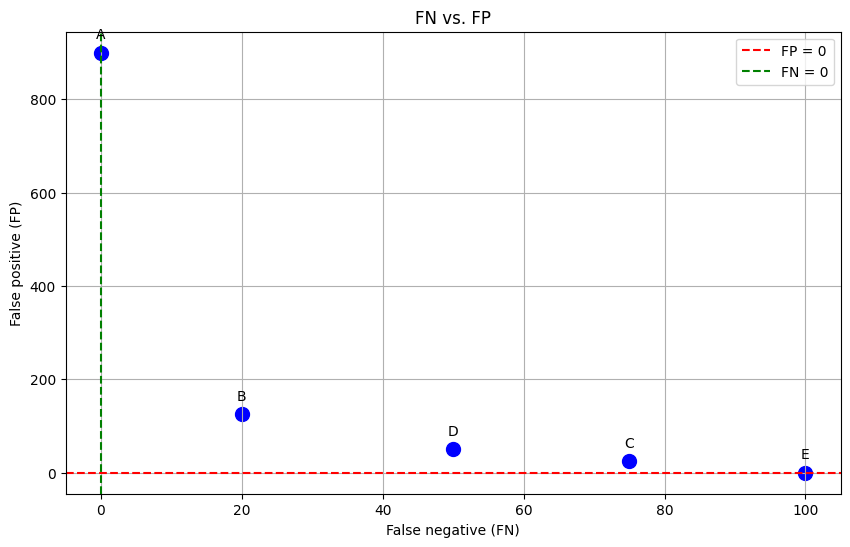

In [38]:
# Define a scatter plot for FN vs. FP
plt.figure(figsize=(10, 6))
plt.scatter(df_original['FN'], df_original['FP'], color='blue', s=100)

# Annotate each point with the method name
for i in range(len(df_original)):
    plt.annotate(df_original['Method'][i],
                 (df_original['FN'][i], df_original['FP'][i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

# Set labels and title
plt.title('FN vs. FP')
plt.xlabel('False negative (FN)')
plt.ylabel('False positive (FP)')
plt.grid()
plt.axhline(y=0, color='r', linestyle='--', label='FP = 0')
plt.axvline(x=0, color='g', linestyle='--', label='FN = 0')
plt.legend()
plt.show()

Again, B and D stand out positively as expected. And methods A and E gave terrible results for the reasons already explained.

## **PR against RC**

Studying a Precision vs. Recall plot illustrates the trade-off between the two metrics: increasing precision often results in decreasing recall, and vice versa. This visualization is especially useful in unbalanced class contexts. By analyzing the relationship between precision and recall, one can identify the optimal threshold that best balances both aspects, thus allowing one to tune the model's performance to the specific needs of the problem.

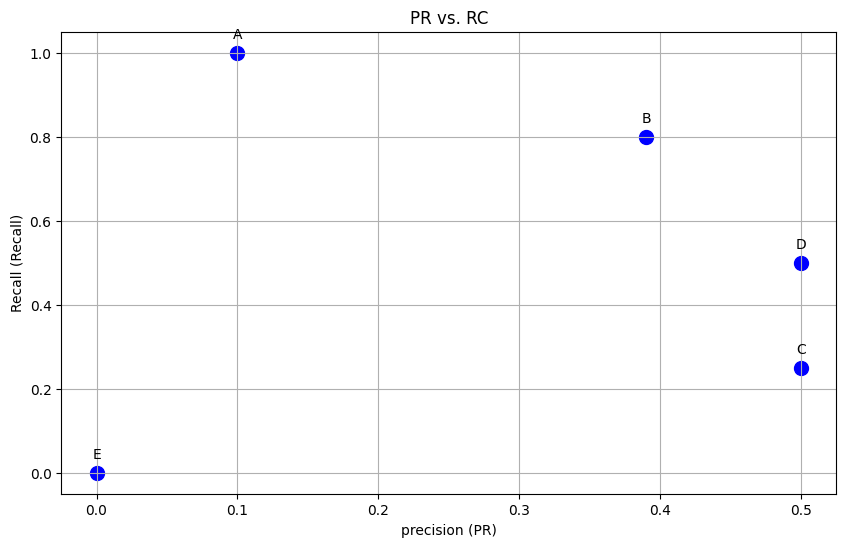

In [40]:
# Define a scatter plot for precision vs. Recall
plt.figure(figsize=(10, 6))
plt.scatter(df_original['Precision'], df_original['Recall'], color='blue', s=100)

# Annotate each point with the method name
for i in range(len(df_original)):
    plt.annotate(df_original['Method'][i],
                 (df_original['Precision'][i], df_original['Recall'][i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

# Set labels and title
plt.title('PR vs. RC')
plt.xlabel('precision (PR)')
plt.ylabel('Recall (RC)')
plt.grid()
plt.show()


This figure is contrary to the previous one, this case is better when the method approaches point 1 for precision and recall, with B being the most outstanding and E the worst performing.

## **ACC against Fm**

Studying an Accuracy versus F-measure plot allows one to evaluate how a classification model performs based on its overall performance (accuracy) and its ability to find true positives (F-measure). Accuracy measures the proportion of correct predictions out of the total number of predictions, which can be misleading in imbalanced datasets where one class dominates (as is the case here). On the other hand, F-measure provides a balance between precision and recall, focusing on the effectiveness of the model in capturing instances of the positive class. Analyzing the relationship between these two metrics helps to identify models that are not only accurate, but also effective in classifying the class of interest, allowing one to choose models that offer balanced and useful performance in practical applications.




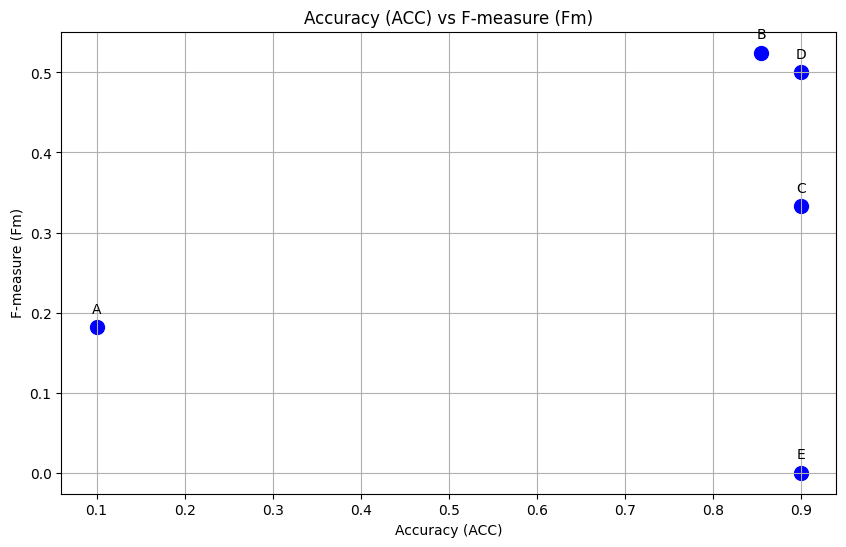

In [44]:
# Define a scatter plot for Accuracy vs. F1
plt.figure(figsize=(10, 6))
plt.scatter(df_original['Accuracy'], df_original['F1'], color='blue', s=100)

# Annotate each point with the method name
for i in range(len(df_original)):
    plt.annotate(df_original['Method'][i],
                 (df_original['Accuracy'][i], df_original['F1'][i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

# Set labels and title
plt.xlabel('Accuracy (ACC)')
plt.ylabel('F-measure (Fm)')
plt.title('Accuracy (ACC) vs F-measure (Fm)')
plt.grid()
plt.show()


This comparison highlights cases like E which may have a high accuracy but a low F-measure, suggesting that it might be failing to detect enough positives, in this case because it directly classifies all of them as erroneous, and as before the metrics that stand out the most are B and D.